## 1. Importing the libraries and dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## 2. Implementing UCB sampling

In [45]:
selected_ads_bin = []

no_of_ads = len(dataset.columns)
no_of_episodes = len(dataset)

N = np.zeros(no_of_ads)
R = np.zeros(no_of_ads)
C = 3/2


for t in range(no_of_episodes):
    selected_ad = 0
    max_upper_bound = 0

    for ad in range(no_of_ads):
        if N[ad] > 0:
            # Exploit + Exploration
            upper_bound = np.divide(R[ad], N[ad]) + math.sqrt(C * math.log(t + 1) / N[ad])
        else:
            upper_bound = 1e400

        # Chooses the ad with highest upper-bound
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            selected_ad = ad
    
    selected_ads_bin.append(selected_ad)
    N[selected_ad] += 1
    R[selected_ad] += dataset.values[t, selected_ad]

## 3. Display results

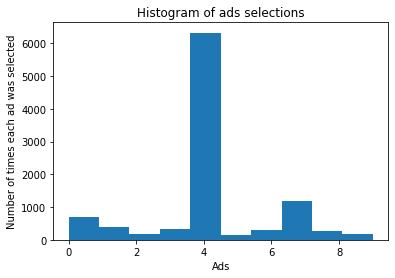

In [46]:
plt.hist(selected_ads_bin)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()